In [10]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

DATASET = "2dcubes"
DATASET_RESULT = "2dcubes_blackbg"

DATA_DIR = Path("outputs/compressed")
DATASET_DIR = DATA_DIR / DATASET
OUT_DIR = DATA_DIR / DATASET_RESULT

OUT_DIR.mkdir(parents=True, exist_ok=True)

image_size = (128, 128)

# BACKGROUND_IMAGE_PATH = "hsv_color_space_2d.png"
# background_image = Image.open(BACKGROUND_IMAGE_PATH)

# background_image = background_image.resize(image_size)
# background_image = np.array(background_image)

# background_image = np.ones((*image_size, 3)) * 255
background_image = np.zeros((*image_size, 3))

In [7]:
DATASET_DIR

PosixPath('outputs/compressed/2dcubes_equiscale_perspective_equi_child_noise_5seq')

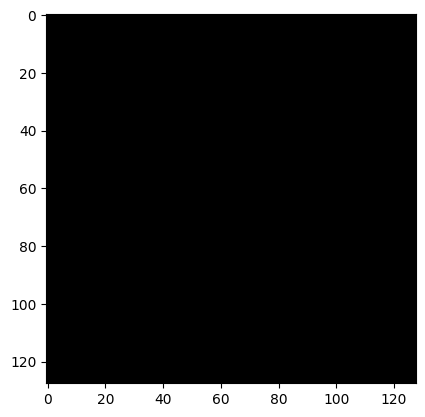

In [8]:
plt.imshow(background_image)

In [9]:
tags = [tag.stem for tag in sorted(DATASET_DIR.iterdir()) if tag.suffix == ".npz"]
tags

['train']

In [10]:
for tag in tags:
    print(f"Composing {tag}")
    # load npz file
    data = dict(np.load(DATASET_DIR / f"{tag}.npz"))
    images = data["imgs"]
    masks = images[:, :, :, :, 3] / 255
    composite_images = images[:, :, :, :, :3] * masks[:, :, :, :, None] + background_image * (
        1 - masks[:, :, :, :, None]
    )
    composite_images = composite_images.astype(np.uint8)
    data["imgs"] = composite_images
    np.savez_compressed(OUT_DIR / f"{tag}.npz", **data)

Composing train


## Add background with mask


In [6]:
images = np.load(DATASET_DIR / f"{tags[0]}.npz")["imgs"]

image = images[0][0]

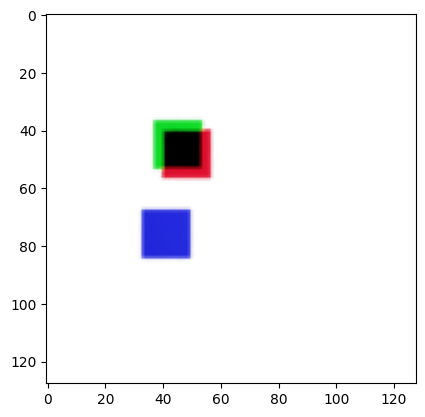

In [7]:
plt.imshow(image)

In [8]:
background_image = Image.open("hsv_color_space_2d.png")
background_image = background_image.resize((image.shape[1], image.shape[0]))
background_image = np.array(background_image)

FileNotFoundError: [Errno 2] No such file or directory: 'hsv_color_space_2d.png'

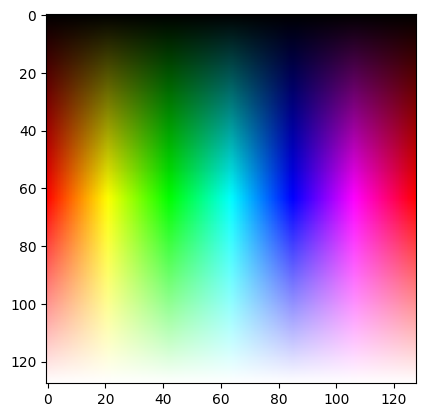

In [24]:
plt.imshow(background_image)

In [25]:
mask = image[:, :, 3] / 255

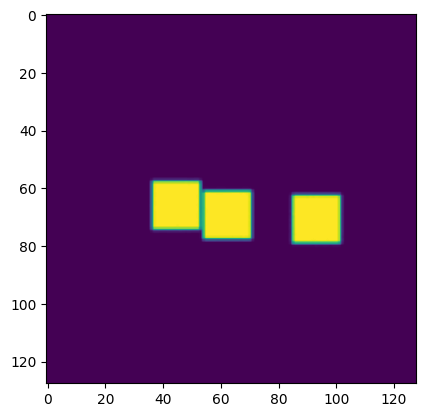

In [26]:
plt.imshow(mask)

In [27]:
# combine image with background using mask
composite_image = image[:, :, :3] * mask[:, :, None] + background_image * (1 - mask[:, :, None])

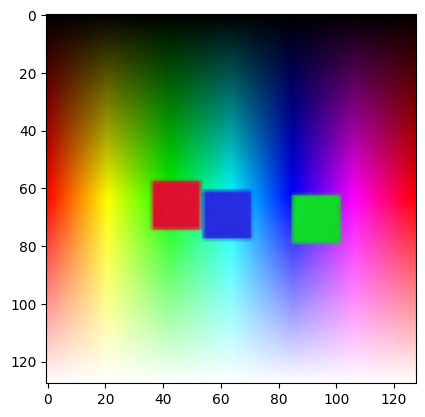

In [28]:
plt.imshow(composite_image.astype(np.uint8))

In [74]:
images.shape

(700, 2, 128, 128, 4)

In [77]:
masks = images[:, :, :, :, 3] / 255

In [79]:
composite_images = images[:, :, :, :, :3] * masks[:, :, :, :, None] + background_image * (
    1 - masks[:, :, :, :, None]
)

In [80]:
composite_images.shape

(700, 2, 128, 128, 3)

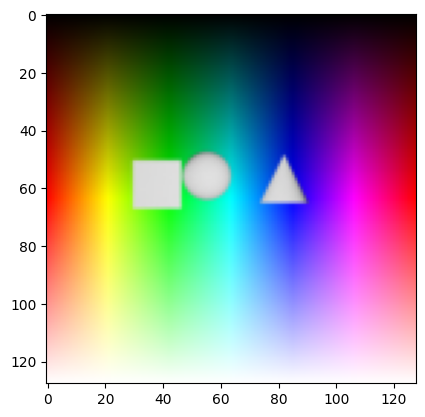

In [94]:
plt.imshow(composite_images[30, 0].astype(np.uint8))

In [106]:
list(np.load(DATASET_DIR / f"{tags[3]}.npz").keys())

['imgs',
 'original_latents',
 'intervention_labels',
 'intervention_masks',
 'epsilon']

## Single image

In [28]:
img_path = Path("/Users/jonas/Library/CloudStorage/GoogleDrive-jonasbernhard96@gmail.com/My Drive/Documents/University/TU Berlin/Master Thesis/thesis/figures/2dcubes_shapes_0.05_example/val_3_x1.png")

In [29]:
img = Image.open(img_path)

img = np.array(img) # (128, 128, 4)

In [30]:
img.shape

(128, 128, 4)

In [31]:
# add black background
background = np.zeros((128, 128, 3))
mask = img[:, :, 3] / 255
composite = img[:, :, :3] * mask[:, :, None] + background * (1 - mask[:, :, None])

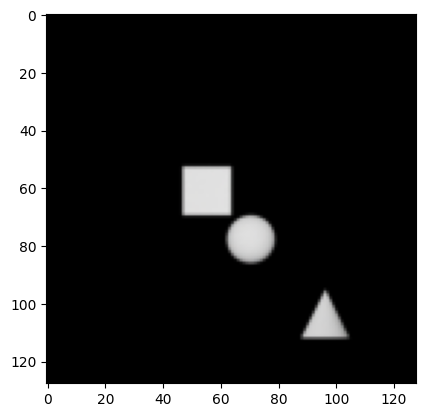

In [32]:
plt.imshow(composite.astype(np.uint8))

In [33]:
# save image
img = Image.fromarray(composite.astype(np.uint8))
img.save("composite.png")